<a href="https://colab.research.google.com/github/ammar01-me/Iris_data_deeplearnig/blob/main/Iris_dataset_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()
df.shape

(150, 5)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


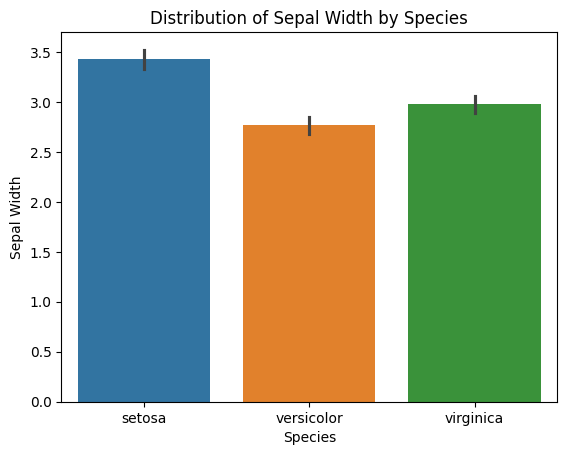

In [ ]:
sns.barplot(x='species', y='sepal_width', data=df,hue='species')
plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.show()

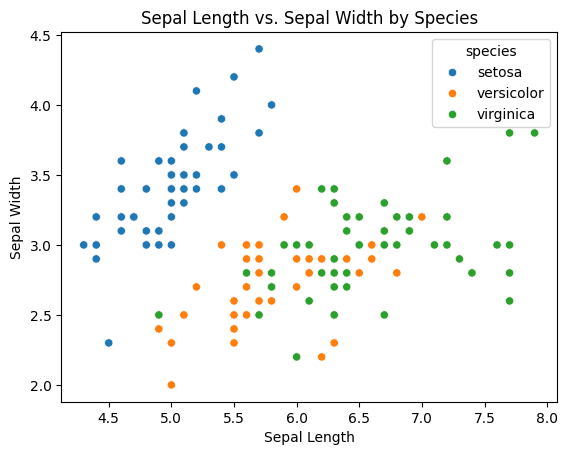

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
neuron = Perceptron(max_iter=100,random_state=42)

In [ ]:
x_unstd = df.drop(columns=['species'])
y = df['species']

In [ ]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x_unstd)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42)

In [ ]:
neuron.fit(X_train, y_train)

Perceptron(max_iter=100, random_state=42)

In [ ]:
y_train_pred = neuron.predict(X_train)
y_test_pred = neuron.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_acc}')
print(f'Testing Accuracy: {test_acc}')

Training Accuracy: 0.9416666666666667
Testing Accuracy: 0.9666666666666667


Making the Artificail neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
from keras.utils import to_categorical

In [ ]:
y_train = y_train.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
y_test = y_test.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
ann = Sequential([
    Dense(8,activation='relu',input_shape=(4,)),
    Dense(4,activation='relu'),
    Dense(3,activation='softmax')
])
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = ann.fit(X_train,y_train_cat,epochs=100,verbose=1,batch_size=5,validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6581 - loss: 1.0574 - val_accuracy: 0.7500 - val_loss: 0.9188
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6937 - loss: 0.9913 - val_accuracy: 0.8750 - val_loss: 0.8886
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6789 - loss: 0.9913 - val_accuracy: 0.9167 - val_loss: 0.8594
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7988 - loss: 0.9383 - val_accuracy: 0.8750 - val_loss: 0.8297
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8296 - loss: 0.8425 - val_accuracy: 0.9167 - val_loss: 0.7976
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8040 - loss: 0.8390 - val_accuracy: 0.9167 - val_loss: 0.7633
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7716 - loss: 0.8328 - val_accuracy: 0.9167 - val_loss: 0.7272
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7886 - loss: 0.7365 - val_accuracy: 0.9167 - 

<Axes: >

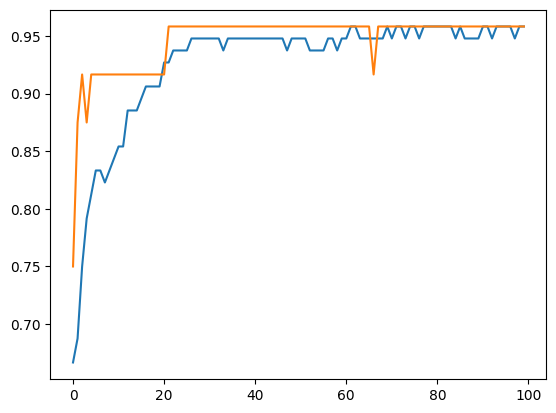

In [ ]:
sns.lineplot(x=history.epoch,y=history.history['accuracy'])
sns.lineplot(x=history.epoch,y=history.history['val_accuracy'])

<Axes: >

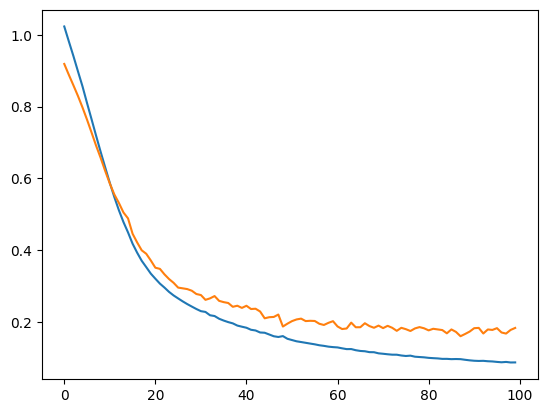

In [ ]:
sns.lineplot(x=history.epoch,y=history.history['loss'])
sns.lineplot(x=history.epoch,y=history.history['val_loss'])